# Practice PS07: Outlier analysis

<font size="+2" color="blue">Additional results: faster method to find all depths</font>

Author: <font color="blue">Alan Le Roux Osorio</font>

E-mail: <font color="blue">alan.leroux01@estudiant.upf.edu</font>

Date: <font color="blue">26/11/2025</font>

In [3]:
# LEAVE THIS CELL AS-IS

import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import random
import numpy as np

# 1. Dataset

In [4]:
# LEAVE THIS CELL AS-IS
#I selected the new dataset so the column is named result instead of label
dft = pd.read_csv('annthyroid.csv', sep=',')
dfc = pd.read_csv('cardio.csv', sep=',')

In [5]:
#We calculate and print the percentage of normal and abnormal patients in both datasets
#the number of patients is given by the number of rows in each dataframe
num_patients_thyrioids = dft.shape[0]
num_patients_cardio = dfc.shape[0]
#number of normal patients is given by counting the number of rows where the result column is 'normal'
num_normal_thyroid = (dft['result'] == 'normal').sum()
num_normal_cardio = (dfc['result'] == 'normal').sum()
#we compute the percentage of normal patients
perc_abnormal_thyroid = num_normal_thyroid / num_patients_thyrioids * 100
perc_normal_cardio = num_normal_cardio / num_patients_cardio * 100

print(f'Thyroid dataset containing: {num_patients_thyrioids} patients\n ')
print(f'Normal: {num_patients_thyrioids - num_normal_thyroid} ({100 - perc_abnormal_thyroid:.2f}%)\n ')
print(f'Abnormal: {num_normal_thyroid} ({perc_abnormal_thyroid:.2f}%)\n ')


print(f'Cardio dataset containing: {num_patients_cardio} patients\n ')
print(f'Normal: {num_patients_cardio - num_normal_cardio} ({100 - perc_normal_cardio:.2f}%)\n ')
print(f'Abnormal: {num_normal_cardio} ({perc_normal_cardio:.2f}%)\n ')



Thyroid dataset containing: 7200 patients
 
Normal: 534 (7.42%)
 
Abnormal: 6666 (92.58%)
 
Cardio dataset containing: 1831 patients
 
Normal: 176 (9.61%)
 
Abnormal: 1655 (90.39%)
 


In [6]:
#we separate the normal and abnormal exams in the thyroid dataset
normal_df = dft[dft['result'] == 'normal']
abnormal_df = dft[dft['result'] == 'abnormal']
#we print the first 10 normal and abnormal exams and their centroids
print("First 10 NORMAL exams (label == 0):")
display(normal_df.head(10))
#we compute the centroid (mean) of all normal exams, excluding the label column
centroid_normal = normal_df.drop(columns=['result']).mean(numeric_only=True).round(6)
print("\nCentroid (mean) of ALL NORMAL exams:")
#Here i convert the series to a dataframe for better visualization
print(centroid_normal.to_frame(name='mean'))

print("\nFirst 10 ABNORMAL exams (label == 1):")
display(abnormal_df.head(10))

centroid_abnormal = abnormal_df.drop(columns=['result']).mean(numeric_only=True).round(6)
print("\nCentroid (mean) of ALL ABNORMAL exams:")
print(centroid_abnormal.to_frame(name='mean'))


First 10 NORMAL exams (label == 0):


,f1,f2,f3,f4,f5,f6,result
0,0.73,0.00060,0.015,0.120,0.082,0.146,normal
1,0.24,0.00025,0.030,0.143,0.133,0.108,normal
2,0.47,0.00190,0.024,0.102,0.131,0.078,normal
3,0.64,0.00090,0.017,0.077,0.090,0.085,normal
4,0.23,0.00025,0.026,0.139,0.090,0.153,normal
5,0.69,0.00025,0.016,0.086,0.070,0.123,normal
6,0.85,0.00025,0.023,0.128,0.104,0.121,normal
7,0.48,0.00208,0.020,0.086,0.078,0.110,normal
8,0.67,0.00130,0.024,0.087,0.109,0.080,normal
9,0.76,0.00010,0.029,0.124,0.128,0.097,normal



Centroid (mean) of ALL NORMAL exams:
        mean
f1  0.518314
f2  0.002098
f3  0.020384
f4  0.112193
f5  0.097705
f6  0.116132

First 10 ABNORMAL exams (label == 1):


,f1,f2,f3,f4,f5,f6,result
10,0.62,0.01100,0.0080,0.0730,0.074,0.0980,abnormal
19,0.50,0.06100,0.0096,0.0130,0.116,0.0110,abnormal
27,0.78,0.02500,0.0090,0.0500,0.084,0.0600,abnormal
43,0.61,0.00979,0.0040,0.0810,0.064,0.1260,abnormal
84,0.56,0.00820,0.0200,0.0660,0.094,0.0700,abnormal
105,0.73,0.04700,0.0110,0.0520,0.090,0.0580,abnormal
115,0.43,0.07000,0.0050,0.0029,0.104,0.0028,abnormal
116,0.42,0.03100,0.0080,0.0130,0.119,0.0110,abnormal
145,0.78,0.00630,0.0110,0.0560,0.086,0.0650,abnormal
147,0.53,0.02500,0.0040,0.0390,0.061,0.0640,abnormal



Centroid (mean) of ALL ABNORMAL exams:
        mean
f1  0.548034
f2  0.039363
f3  0.014891
f4  0.074940
f5  0.099500
f6  0.076803


Based on the centroids, the most informative features appear to be f2, f4, and f6, since these show the largest differences between the two groups. Abnormal cases have much higher values in f2, and noticeably lower values in f4 and f6. In contrast, f3 and f5 are very similar across both centroids and are likely less useful for separation.

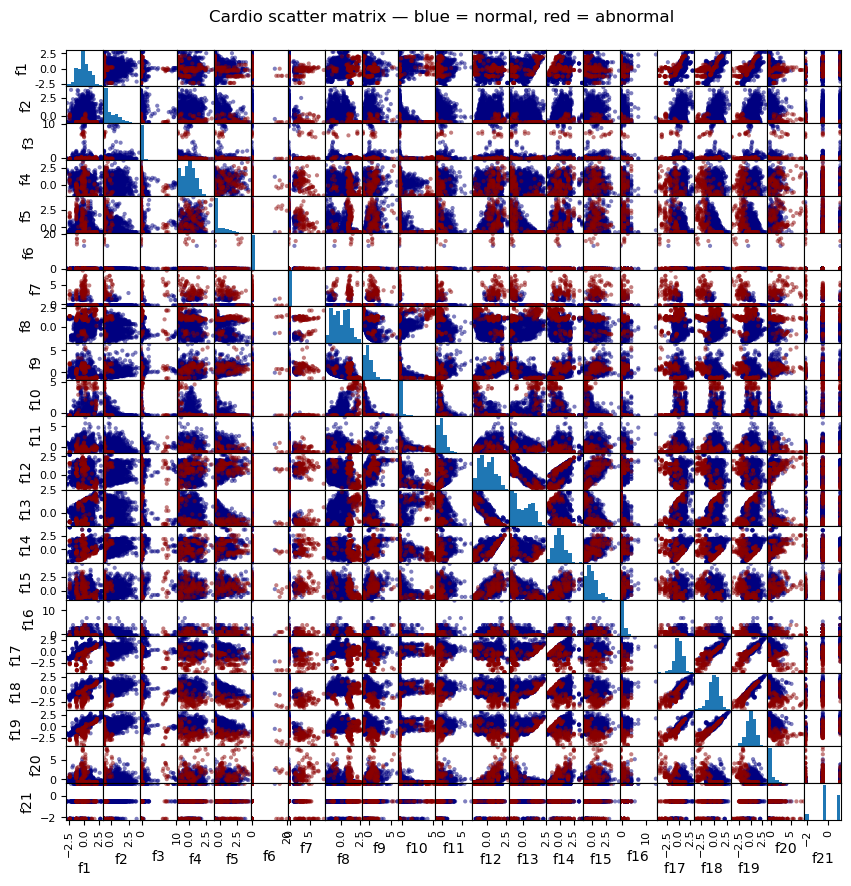

In [7]:
# Scatter matrix for the "cardio" dataset (blue=normal, red=abnormal)
color_code = {'abnormal': 'darkred', 'normal': 'navy'}
colors = dfc['result'].apply(lambda x: color_code[x])

pd.plotting.scatter_matrix(dfc, c=colors,figsize=(10,10))
plt.suptitle("Cardio scatter matrix — blue = normal, red = abnormal", y=0.92)
plt.show()

Looking at the scatter matrix, we can already see that the normal and abnormal points don’t mix completely. In several feature pairs, the red abnormal points appear in areas where there are fewer blue points, especially when one feature is high and the other is low. So even without understanding everything, it seems that some combinations of features help separate the two groups a bit. There is still a lot of overlap, but we can notice some patterns forming.

# 1. Create isolation tree

## 1.1. Random dimension and random split

In [8]:
#Here I define a function that picks a random dimension from a dataframe, ignoring specified columns
def pick_random_dimension(df, columns_to_ignore):
    available_columns = [col for col in df.columns if col not in columns_to_ignore]
    return random.choice(available_columns)



In [9]:
# LEAVE THIS CODE AS-IS
# Testing code

print("Random dimensions for the 'thyroid' dataset")
print(pick_random_dimension(dft, ["result"]))
print(pick_random_dimension(dft, ["result"]))
print()

print("Random dimensions for the 'cardio' dataset")
print(pick_random_dimension(dfc, ["result"]))
print(pick_random_dimension(dfc, ["result"]))

Random dimensions for the 'thyroid' dataset
f6
f1

Random dimensions for the 'cardio' dataset
f4
f5


In [10]:

#I define a function that picks a random split value for a given dimension in a dataframe
def pick_random_split(df, dimension):
    
    lo = np.min(df[dimension])
    hi = np.max(df[dimension])
    return float(np.random.uniform(lo, hi))

# And I test the function
print("\nRandom splits for the 'thyroid' dataset")
print(pick_random_split(dft, "f1"))
print(pick_random_split(dft, "f3"))


Random splits for the 'thyroid' dataset
0.8762153857879034
0.17542371401170492


In [11]:
# LEAVE THIS CODE AS-IS

print("Random splits according to 'f4' in the 'thyroid' dataset")
print(pick_random_split(dft, "f4"))
print(pick_random_split(dft, "f4"))
print()
print("Random splits according to 'f15' in the 'cardio' dataset")
print(pick_random_split(dfc, "f15"))
print(pick_random_split(dfc, "f15"))

Random splits according to 'f4' in the 'thyroid' dataset
0.5179776497033566
0.03330463637845088

Random splits according to 'f15' in the 'cardio' dataset
1.8262005712852603
0.5318799388768041


## 1.2. Implement split data into two

In [12]:
#I define this function that splits a dataframe into two dataframes according to a given dimension and split value
def split_dataset(df,dimension,split):
    left_split = df[df[dimension] <= split]
    right_split = df[df[dimension] > split]
    return left_split, right_split



In [13]:

#I test the function with the parameters given by the statement
dimension = 'f1'
split_value = 0.5

left, right = split_dataset(dft, dimension, split_value)

print(f"Total rows in original dataset: {len(dft)}")
print(f"Rows with {dimension} <= {split_value}: {len(left)}")
print(f"Rows with {dimension} >  {split_value}: {len(right)}")
print(f"Sum of sizes: {len(left) + len(right)}")

# Check if the sizes match
print("\nCheck:")
print("Left + Right =", len(left) + len(right))



Total rows in original dataset: 7200
Rows with f1 <= 0.5: 3169
Rows with f1 >  0.5: 4031
Sum of sizes: 7200

Check:
Left + Right = 7200


## 1.3. Create one isolation tree

In [14]:
# LEAVE THIS COLUMN AS-IS

dfti = dft.copy()
dfti.insert(0, 'id', [("P%.4d" % x) for x in range(1, 1 + len(dft))])
display(dfti.head(5))

dfci = dfc.copy()
dfci.insert(0, 'id', [("P%.4d" % x) for x in range(1, 1 + len(dfc))])
display(dfci.head(5))

,id,f1,f2,f3,f4,f5,f6,result
0,P0001,0.73,0.00060,0.015,0.120,0.082,0.146,normal
1,P0002,0.24,0.00025,0.030,0.143,0.133,0.108,normal
2,P0003,0.47,0.00190,0.024,0.102,0.131,0.078,normal
3,P0004,0.64,0.00090,0.017,0.077,0.090,0.085,normal
4,P0005,0.23,0.00025,0.026,0.139,0.090,0.153,normal


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f13,f14,f15,f16,f17,f18,f19,f20,f21,result
0,P0001,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,...,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294,normal
1,P0002,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,...,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294,normal
2,P0003,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,...,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018,normal
3,P0004,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,...,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018,normal
4,P0005,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,...,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018,normal


In [15]:

#I define this function that builds an isolation tree recursively
def isolation_tree(data, columns_to_ignore, min_items):
    tree = {}
    
    # Base case: create a leaf node
    if len(data) <= min_items:
        return {"contents": data}
    else:
    
    # Select random dimension and split
        dimension = pick_random_dimension(data, columns_to_ignore)
        split = pick_random_split(data, dimension)
        
        # Split the dataset
        left_data, right_data = split_dataset(data, dimension, split)
        
        # Create recursive nodes
        left_tree = isolation_tree(left_data, columns_to_ignore, min_items)
        right_tree = isolation_tree(right_data, columns_to_ignore, min_items)
        
        # Internal node
        tree = {
            "left": left_tree,
            "right": right_tree,
            "dimension": dimension,
            "split": split
        }
        
        return tree
  


In [16]:
# LEAVE THIS CODE AS-IS

class tree_drawing(object):
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __str__(self, label='', level=0):
        ret = "-" * level + label + ":" + repr(self.value)+"\n"
        if self.left:
            ret += self.left.__str__("<", level+1)
        if self.right:
            ret += self.right.__str__(">", level+1)
        return ret

    def __repr__(self):
        return self.value
    
def tree_to_nodes(tree):
    if 'contents' in tree:
        data = tree['contents']
        normal_count = len(data[data['result'] == 'normal'])
        abnormal_count = len(data[data['result'] == 'abnormal'])
        description = "external node: %d normal + %d abnormal" % (normal_count, abnormal_count)
        return tree_drawing(description)
    else:
        left = tree['left']
        right = tree['right']
        description = 'internal node: ' + tree['dimension'] + ' <= ' + ("%.2f" % tree['split'])
        n = tree_drawing(description, tree_to_nodes(left), tree_to_nodes(right) )
        return n

In [17]:
# LEAVE THIS CODE AS-IS

mytree_thyroid = isolation_tree(dfti, ['id', 'result'], 2000)
mytree_cardio = isolation_tree(dfci, ['id', 'result'], 200)

In [18]:

# LEAVE THIS CODE AS-IS

print("Tree built on the 'thyroid' dataset")
print(tree_to_nodes(mytree_thyroid))
print()

print("Tree built on the 'cardio' dataset")
print(tree_to_nodes(mytree_cardio))
print()

Tree built on the 'thyroid' dataset
:'internal node: f2 <= 0.46'
-<:'internal node: f2 <= 0.15'
--<:'internal node: f3 <= 0.05'
---<:'internal node: f3 <= 0.04'
----<:'internal node: f1 <= 0.30'
-----<:'external node: 1012 normal + 56 abnormal'
----->:'internal node: f5 <= 0.08'
------<:'external node: 540 normal + 39 abnormal'
------>:'internal node: f5 <= 0.18'
-------<:'internal node: f1 <= 0.48'
--------<:'external node: 1548 normal + 91 abnormal'
-------->:'internal node: f1 <= 0.53'
---------<:'external node: 323 normal + 32 abnormal'
--------->:'internal node: f2 <= 0.14'
----------<:'internal node: f5 <= 0.09'
-----------<:'external node: 546 normal + 46 abnormal'
----------->:'internal node: f6 <= 0.23'
------------<:'internal node: f1 <= 0.59'
-------------<:'external node: 630 normal + 55 abnormal'
------------->:'internal node: f6 <= 0.20'
--------------<:'internal node: f6 <= 0.00'
---------------<:'external node: 0 normal + 3 abnormal'
--------------->:'internal node: f4 

In [19]:

#Function that computes the maximum depth of a tree
def get_max_tree_depth(tree):
    if 'contents' in tree:
        return 0
    else:
        left_depth = get_max_tree_depth(tree['left'])
        right_depth = get_max_tree_depth(tree['right'])
        return 1 + max(left_depth, right_depth)

In [20]:
# LEAVE THIS CODE AS-IS
# Testing code

print("Depth of the random tree you built over the 'thyroid' dataset")
print(get_max_tree_depth(mytree_thyroid))
print()

print("Depth of the random tree you built over the 'cardio' dataset")
print(get_max_tree_depth(mytree_cardio))
print()

Depth of the random tree you built over the 'thyroid' dataset
17

Depth of the random tree you built over the 'cardio' dataset
19



# 2. Create isolation forests and find depth of items



## 2.1. Create an isolation forest

In [21]:

#  I define this function that creates an array of isolation trees (the forest)
def isolation_forest(df, columns_to_ignore, min_items, num_trees):
    forest = []
    for _ in range(num_trees):
        tree = isolation_tree(df, columns_to_ignore, min_items)
        forest.append(tree)
    return forest

In [22]:
# LEAVE AS-IS OR MODIFY IF YOU SEE THAT IT IMPROVES THE SEPARATION BETWEEN CLASSES
# If you change 'min_items' or 'num_trees', indicate here that you have changed them

min_items_thyroid = 50
num_trees_thyroid = 20

myforest_thyroid = isolation_forest(dfti, ['id', 'result'], min_items_thyroid, num_trees_thyroid)
print("The 'thyroid' forest has %d trees" % len(myforest_thyroid))

min_items_cardio = 50
num_trees_cardio = 20

myforest_cardio = isolation_forest(dfci, ['id', 'result'], min_items_cardio, num_trees_cardio)
print("The 'cardio' forest has %d trees" % len(myforest_cardio))

The 'thyroid' forest has 20 trees
The 'cardio' forest has 20 trees


In [23]:
# LEAVE THIS CODE AS-IS

print("Thyroid forest (first two trees)")
print(tree_to_nodes(myforest_thyroid[0]))
print(tree_to_nodes(myforest_thyroid[1]))
print()

print("Cardio forest (first two trees)")
print(tree_to_nodes(myforest_cardio[0]))
print(tree_to_nodes(myforest_cardio[1]))
print()


Thyroid forest (first two trees)
:'internal node: f2 <= 0.30'
-<:'internal node: f2 <= 0.21'
--<:'internal node: f6 <= 0.33'
---<:'internal node: f4 <= 0.03'
----<:'internal node: f6 <= 0.11'
-----<:'internal node: f3 <= 0.00'
------<:'external node: 6 normal + 32 abnormal'
------>:'internal node: f3 <= 0.01'
-------<:'external node: 5 normal + 45 abnormal'
------->:'external node: 11 normal + 4 abnormal'
----->:'external node: 1 normal + 0 abnormal'
---->:'internal node: f1 <= 0.25'
-----<:'internal node: f6 <= 0.17'
------<:'internal node: f3 <= 0.06'
-------<:'internal node: f1 <= 0.14'
--------<:'internal node: f3 <= 0.01'
---------<:'external node: 4 normal + 0 abnormal'
--------->:'internal node: f2 <= 0.04'
----------<:'internal node: f2 <= 0.01'
-----------<:'internal node: f4 <= 0.13'
------------<:'internal node: f2 <= 0.01'
-------------<:'internal node: f6 <= 0.11'
--------------<:'external node: 37 normal + 2 abnormal'
-------------->:'external node: 16 normal + 1 abnormal

## 2.2. Find the average depth of an item

In [24]:
# LEAVE AS-IS

def find_element_depth_aux(tree, column_name, column_value, depth):
    
    if 'contents' in tree:
        # We are in a leaf node
        
        data = tree['contents']
        matching = data[data[column_name] == column_value]
        if len(matching) == 0:
            return None
        elif len(matching) > 1:
            print("Error: multiple elements match your search criterion")
            return None
        else:
            return depth
    else:
        # We are in an internal node
        
        in_left = find_element_depth_aux(tree['left'], column_name, column_value, depth+1)
        if in_left == None:
            in_right = find_element_depth_aux(tree['right'], column_name, column_value, depth+1)
            return in_right
        else:
            return in_left
        
def find_element_depth(tree, column_name, column_value):
    return find_element_depth_aux(tree, column_name, column_value, 0)

In [25]:
# LEAVE AS-IS

def print_sample_depths(df, sample_size, tested_tree):

    for result in ['normal', 'abnormal']:
        print("Depths for %s items" % result)

        sample = list(df[df['result'] == result]['id'].sample(sample_size))

        max_depth = get_max_tree_depth(tested_tree)
        for random_id in sample:
            print("- id=%s is at depth %d/%d" % (random_id, find_element_depth(tested_tree, "id", random_id), max_depth))
            
    
print("Shallow tree for thyroid, having maximum depth %d" % get_max_tree_depth(mytree_thyroid))
print_sample_depths(dfti, 5, mytree_thyroid)
print()

print("Shallow tree for cardio, having maximum depth %d" % get_max_tree_depth(mytree_cardio))
print_sample_depths(dfci, 5, mytree_cardio)
print()

Shallow tree for thyroid, having maximum depth 17
Depths for normal items
- id=P1513 is at depth 5/17
- id=P0815 is at depth 6/17
- id=P2796 is at depth 17/17
- id=P2221 is at depth 6/17
- id=P2603 is at depth 4/17
Depths for abnormal items
- id=P5931 is at depth 6/17
- id=P2554 is at depth 13/17
- id=P0696 is at depth 11/17
- id=P3343 is at depth 17/17
- id=P3898 is at depth 17/17

Shallow tree for cardio, having maximum depth 19
Depths for normal items
- id=P1638 is at depth 9/19
- id=P0472 is at depth 10/19
- id=P0275 is at depth 4/19
- id=P1250 is at depth 4/19
- id=P0446 is at depth 9/19
Depths for abnormal items
- id=P1826 is at depth 9/19
- id=P1715 is at depth 8/19
- id=P1795 is at depth 9/19
- id=P1755 is at depth 2/19
- id=P1745 is at depth 9/19



The depths seem pretty mixed for both datasets. In the thyroid tree, normal and abnormal items appear at similar depths, ranging from shallow to close to the maximum. The same happens in the cardio tree, where both classes show a wide spread of depths. So, from these shallow trees, there is no clear pattern that one class tends to be isolated earlier than the other. It looks more like both types get split in many different branches without a strong difference between them.

In [26]:

# This function computes the average depth of an element in a forest of isolation trees
def find_average_depth(forest, column_name, value):
    total_depth = 0
    num_trees = len(forest)
    #I iterate over each tree in the forest to compute the depth of the element
    for tree in forest:
        depth = find_element_depth(tree, column_name, value)
        if depth is not None:
            total_depth += depth
        else:
            num_trees -= 1  # I decrease the count if the element is not found in this tree
    
    if num_trees == 0:
        return None  # THis means the element is not found in any tree
    
    average_depth = total_depth / num_trees
    return average_depth

In [27]:
# LEAVE AS-IS

def test_random_elements(df, forest):
    for result in ['normal', 'abnormal']:
        print("Average depths for %s items" % result)

        sample = list(df[df['result'] == result]['id'].sample(5))

        for random_id in sample:
            print("- id=%s is at average depth %.1f" % (random_id, find_average_depth(forest, "id", random_id)))

        print()
        
print("Testing forest for the 'thyroid' dataset")
test_random_elements(dfti, myforest_thyroid)
print()

print("Testing forest for the 'cardio' dataset")
test_random_elements(dfti, myforest_thyroid)
print()



Testing forest for the 'thyroid' dataset
Average depths for normal items
- id=P0660 is at average depth 26.3
- id=P3250 is at average depth 21.5
- id=P4232 is at average depth 16.8
- id=P2466 is at average depth 21.4
- id=P4208 is at average depth 22.6

Average depths for abnormal items
- id=P6769 is at average depth 12.2
- id=P5003 is at average depth 16.9
- id=P3755 is at average depth 13.2
- id=P3967 is at average depth 16.6
- id=P7179 is at average depth 14.4


Testing forest for the 'cardio' dataset
Average depths for normal items
- id=P5163 is at average depth 15.4
- id=P4211 is at average depth 19.9
- id=P3245 is at average depth 18.1
- id=P1726 is at average depth 12.8
- id=P4402 is at average depth 25.1

Average depths for abnormal items
- id=P4179 is at average depth 15.2
- id=P0146 is at average depth 15.8
- id=P3165 is at average depth 10.6
- id=P4998 is at average depth 14.9
- id=P3829 is at average depth 15.8




To make it more efficient, instead of searching the whole tree once per element, I would traverse each tree only one time and record the depth of every item I encounter. This way, I collect all element-depth pairs in a single pass, and then computing the average depth for all elements becomes just a simple aggregation step. This avoids repeating the same recursive work many times.This way, each node and element is visited only once per tree (O(N)), instead of repeatedly performing independent searches (O(N²)):

In [38]:
def collect_depth_for_value(tree, depth, column_name, value, depths):
    if 'contents' in tree:
        col = tree['contents'][column_name]
        for v in col:
            if v == value:
                depths.append(depth)
    else:
        collect_depth_for_value(tree['left'],  depth+1, column_name, value, depths)
        collect_depth_for_value(tree['right'], depth+1, column_name, value, depths)

#I define this function that computes the average depth of an element across all trees in the forest in an alternative and more efficient way
def find_average_depth_all(forest, column_name, value):
    depths = []
    for tree in forest:
        #I traverse the tree and collect all depths where the element is found
        collect_depth_for_value(tree, 0, column_name, value, depths)

    if not depths:
        return None
    #I compute and return the average depth
    return float(sum(depths)) / len(depths)

# 3. Find the average depth of a sample of normal and abnormal points

## 3.1. Determine average depths

In [39]:
# LEAVE AS-IS

SAMPLE_SIZE = 30

print("Thyroid dataset")
abnormal_thyroid_sample = list(dfti[dfti['result'] == 'abnormal']['id'].sample(SAMPLE_SIZE))
normal_thyroid_sample = list(dfti[dfti['result'] == 'normal']['id'].sample(SAMPLE_SIZE))
print("Normal point sample ids   : %s" % abnormal_thyroid_sample)
print("Abnormal point sample ids : %s" % normal_thyroid_sample)

print()

print("Cardio dataset")
abnormal_cardio_sample = list(dfci[dfci['result'] == 'abnormal']['id'].sample(SAMPLE_SIZE))
normal_cardio_sample = list(dfci[dfci['result'] == 'normal']['id'].sample(SAMPLE_SIZE))
print("Normal point sample ids   : %s" % abnormal_cardio_sample)
print("Abnormal point sample ids : %s" % normal_cardio_sample)


Thyroid dataset
Normal point sample ids   : ['P7118', 'P5308', 'P6374', 'P0782', 'P6022', 'P5857', 'P6627', 'P2217', 'P3380', 'P6170', 'P1190', 'P4216', 'P2646', 'P2237', 'P3167', 'P1740', 'P4700', 'P3552', 'P3920', 'P6441', 'P4094', 'P2691', 'P2456', 'P6091', 'P2147', 'P0290', 'P5913', 'P0839', 'P6592', 'P6912']
Abnormal point sample ids : ['P2581', 'P3772', 'P1205', 'P1632', 'P4711', 'P4290', 'P1760', 'P3774', 'P5693', 'P1766', 'P7086', 'P3972', 'P5922', 'P4539', 'P5480', 'P6571', 'P4785', 'P4623', 'P5640', 'P3367', 'P1780', 'P2876', 'P0352', 'P5239', 'P0336', 'P1817', 'P6010', 'P3149', 'P5610', 'P0929']

Cardio dataset
Normal point sample ids   : ['P1789', 'P1661', 'P1702', 'P1755', 'P1775', 'P1782', 'P1706', 'P1742', 'P1759', 'P1704', 'P1756', 'P1760', 'P1801', 'P1713', 'P1812', 'P1743', 'P1766', 'P1715', 'P1802', 'P1814', 'P1786', 'P1816', 'P1763', 'P1738', 'P1800', 'P1695', 'P1753', 'P1821', 'P1684', 'P1656']
Abnormal point sample ids : ['P0747', 'P1375', 'P1498', 'P0531', 'P1597

<font size="+1" color="red">Extra execution.</font>

In [40]:
# LEAVE AS-IS

def print_average_depths(forest, sample):
    depths = []
    for i in sample:
        depth = find_average_depth_all(forest, 'id', i)# find_average_depth replaced by find_average_depth_all for extra
        depths.append(depth)
        print(" element id=%s is at average depth %2.f" % (i, depth))
    return depths

print("THYROID dataset")
print("Depths of items in the 'normal' sample:")
normal_depths_thyroid = print_average_depths(myforest_thyroid, normal_thyroid_sample)
print("Depths of items in the 'abnormal' sample:")
abnormal_depths_thyroid = print_average_depths(myforest_thyroid, abnormal_thyroid_sample)
print()

print("CARDIO dataset")
print("Depths of items in the 'normal' sample:")
normal_depths_cardio = print_average_depths(myforest_cardio, normal_cardio_sample)
print("Depths of items in the 'abnormal' sample:")
abnormal_depths_cardio = print_average_depths(myforest_cardio, abnormal_cardio_sample)
print()


THYROID dataset
Depths of items in the 'normal' sample:
 element id=P2581 is at average depth 16
 element id=P3772 is at average depth 24
 element id=P1205 is at average depth 22
 element id=P1632 is at average depth 25
 element id=P4711 is at average depth 21
 element id=P4290 is at average depth 19
 element id=P1760 is at average depth 21
 element id=P3774 is at average depth 21
 element id=P5693 is at average depth 20
 element id=P1766 is at average depth 20
 element id=P7086 is at average depth 26
 element id=P3972 is at average depth 22
 element id=P5922 is at average depth 19
 element id=P4539 is at average depth 23
 element id=P5480 is at average depth 20
 element id=P6571 is at average depth 24
 element id=P4785 is at average depth 19
 element id=P4623 is at average depth 23
 element id=P5640 is at average depth  8
 element id=P3367 is at average depth 12
 element id=P1780 is at average depth 22
 element id=P2876 is at average depth 19
 element id=P0352 is at average depth 21
 

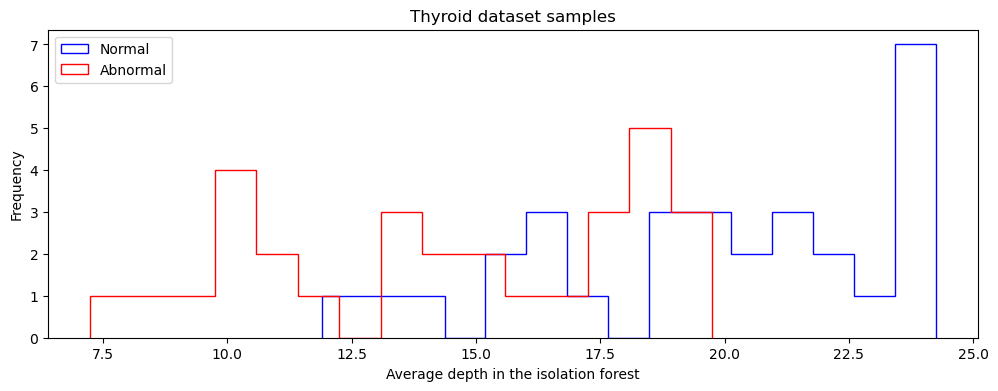

In [31]:
# LEAVE AS-IS

plt.figure(figsize=(12,4))
plt.hist(normal_depths_thyroid, label='Normal', bins=15, density=False, histtype='step', color='blue')
plt.hist(abnormal_depths_thyroid, label='Abnormal', bins=15, density=False, histtype='step', color='red')
plt.title('Thyroid dataset samples')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

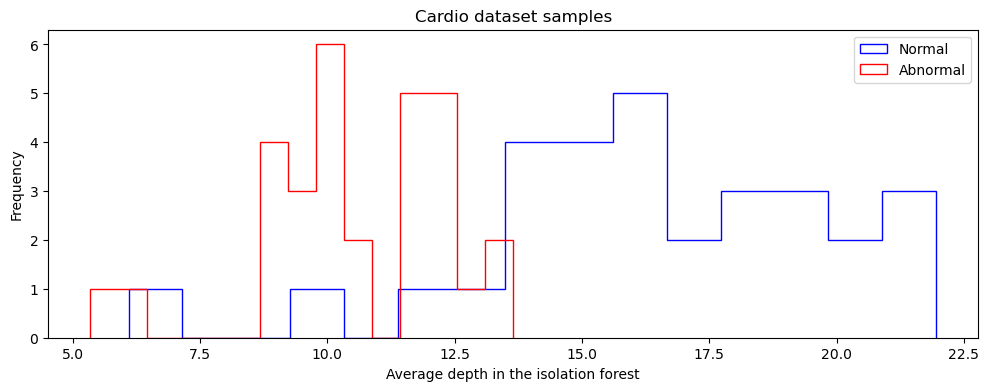

In [32]:
# LEAVE AS-IS

plt.figure(figsize=(12,4))
plt.hist(normal_depths_cardio, label='Normal', bins=15, density=False, histtype='step', color='blue')
plt.hist(abnormal_depths_cardio, label='Abnormal', bins=15, density=False, histtype='step', color='red')
plt.title('Cardio dataset samples')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In these histograms we can see that both datasets have some overlap, but the thyroid one shows a much larger overlapping range between normal and abnormal depths. This suggests that the thyroid dataset is harder to separate, since the depth patterns of both classes look more similar. This matches what we observed in the shallow trees from exercise 2.2, where normal and abnormal thyroid exams also appeared at similar depths.

## 3.2. Compute outlier scores and conclude

In [33]:
# LEAVE THIS CODE AS-IS
# Source: https://stackoverflow.com/a/27683292/1235784

from numpy import euler_gamma
from scipy.special import digamma
def harmonic(s):
    return digamma(s + 1) + euler_gamma

In [34]:
# LEAVE THIS CODE AS-IS

def outlier_score_factory(df):
    n = len(df.index)
    c_n = 2.0 * harmonic(n - 1.0) - (2.0 * (n-1)/n)
    return lambda d: 2.0**(-d/c_n)

outlier_score_thyroid = outlier_score_factory(dfti)
outlier_score_cardio = outlier_score_factory(dfci)

# Compute the scores for thyroid
normal_scores_thyroid = [outlier_score_thyroid(d) for d in normal_depths_thyroid]
abnormal_scores_thyroid = [outlier_score_thyroid(d) for d in abnormal_depths_thyroid]

# Compute the scores for cardio
normal_scores_cardio = [outlier_score_cardio(d) for d in normal_depths_cardio]
abnormal_scores_cardio = [outlier_score_cardio(d) for d in abnormal_depths_cardio]

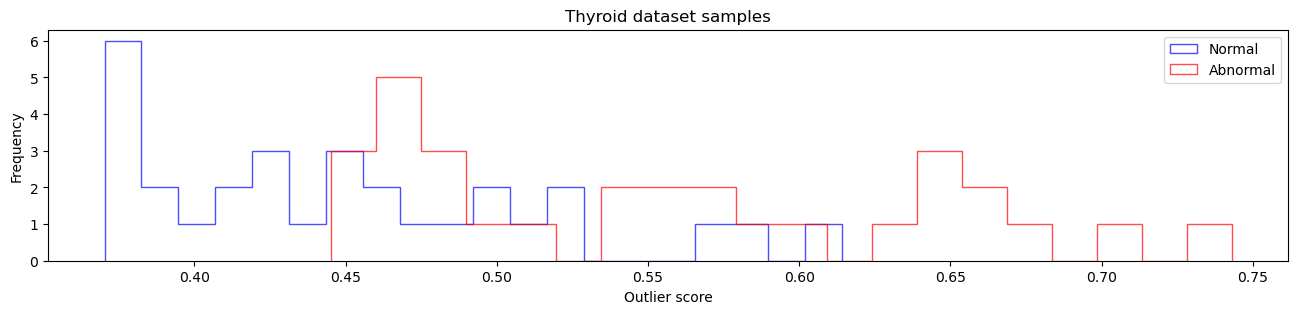

In [35]:
# LEAVE AS-IS

plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores_thyroid, label='Normal', bins=20, density=False, histtype='step', color='blue', alpha=0.7)
plt.hist(abnormal_scores_thyroid, label='Abnormal', bins=20, density=False, histtype='step', color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.title("Thyroid dataset samples")
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

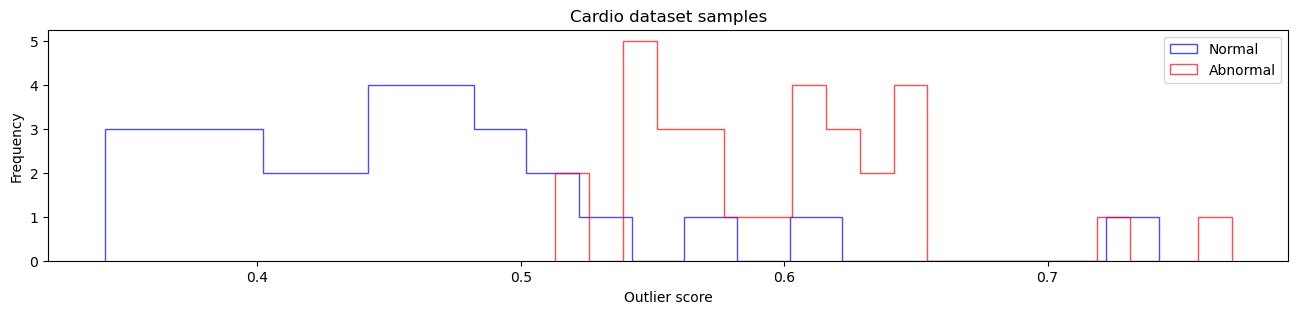

In [36]:
# LEAVE AS-IS

plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores_cardio, label='Normal', bins=20, density=False, histtype='step', color='blue', alpha=0.7)
plt.hist(abnormal_scores_cardio, label='Abnormal', bins=20, density=False, histtype='step', color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.title("Cardio dataset samples")
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In the thyroid histogram, the normal scores (blue) and abnormal scores (red) overlap much more, especially in the range between 0.4 and 0.53. Although the abnormal distribution stretches a bit higher, the large overlap makes the dataset harder to isolate.

In contrast, the cardio dataset shows much less overlap. There is still some between roughly 0.48 and 0.58, but it is clearly smaller than in the thyroid case. This suggests that isolation works better on the cardio data, although there are still a few cases where normal and abnormal exams remain difficult to separate.

In [37]:
#Exhaustive search over all unique outlier scores
#I define this function that finds the best threshold to separate normal and abnormal scores
def find_best_threshold(normal_scores, abnormal_scores):
    # Combine all scores and find unique thresholds
    all_scores = np.array(normal_scores + abnormal_scores)
    unique_thresholds = np.unique(all_scores)

    best_threshold = None
    best_accuracy = -1
    # Calculate the total number of scores
    total = len(normal_scores) + len(abnormal_scores)
    #Iterate over each unique threshold to find the one that gives the best accuracy
    for thresh in unique_thresholds:
        normal_correct = sum(s <= thresh for s in normal_scores)
        abnormal_correct = sum(s > thresh for s in abnormal_scores)

        accuracy = (normal_correct + abnormal_correct) / total
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = thresh

    return best_threshold, best_accuracy

# Perform the search for both datasets and print the results
thyroid_threshold, thyroid_accuracy = find_best_threshold(normal_scores_thyroid, abnormal_scores_thyroid)
print("Best threshold for THYROID:", thyroid_threshold)
print("Accuracy:", thyroid_accuracy)


cardio_threshold, cardio_accuracy = find_best_threshold(normal_scores_cardio, abnormal_scores_cardio)
print("Best threshold for CARDIO:", cardio_threshold)
print("Accuracy:", cardio_accuracy)


Best threshold for THYROID: 0.44889273136232455
Accuracy: 0.7833333333333333
Best threshold for CARDIO: 0.5056583203404538
Accuracy: 0.9333333333333333


The thyroid threshold has an accuracy of about 73%. It correctly classifies most cases, but there is still a noticeable portion of misclassified exams. This suggests that normal and abnormal thyroid patterns overlap, making them harder to separate.

The cardio threshold performs better, reaching about 90% accuracy. Even so, a few misclassifications remain, meaning that some normal and abnormal patterns are still difficult to distinguish using only isolation-based outlier scores.


<font size="+1" color="red">I made the extra exercise, see above just before starting point 3 and then the consequent executions in 3.</font>

<font size="+2" color="#003300">I hereby declare that I completed this practice myself, that my answers were not written by an AI-enabled code assistant, and that except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>